<a href="https://colab.research.google.com/github/thumb-chuu/BigData-Internship_statistics/blob/main/%EC%97%84%EC%A7%80%EC%88%98_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱회귀(Logistic Regression) 실습

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [2]:
# 패키지 임포트
import os
import warnings
# FutureWarning 제거
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd # pandas package
import numpy as np # numpy package
from scipy import stats # Scipy Package
from sklearn import datasets # sklearn dataset
from sklearn.model_selection import train_test_split # 데이터셋 분리
# 시각화 패키지
import matplotlib.pyplot as plt # matplotlib 시각화 패키지
import seaborn as sns
%matplotlib inline

# os에 따른 Font 깨짐 제거를 위해 Font 지정 
import os 
if os.name == 'nt' :
    font_family = "NanumBarunGothic" # Windows OS 
else :
    font_family = "NanumBarunGothic" # MAC OS 

# - 값이 깨지는 문제 해결을 위해 파라미터 값 설정 
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})

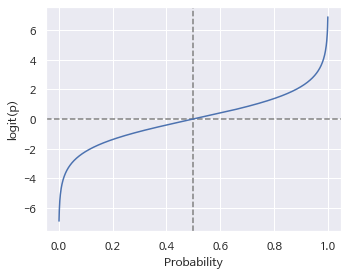

In [3]:
## 로짓 펑션 시각화
p = np.arange(0.001, 1, 0.001)

logit_df = pd.DataFrame({
    'p': p,
    'logit': np.log(p / (1- p)),
    'odds': p / (1- p),
})

fig, ax = plt.subplots(figsize=(5, 4))
ax.axhline(0, color='grey', linestyle='--')
ax.axvline(0.5, color='grey', linestyle='--')
ax.plot(logit_df['p'], logit_df['logit'])
ax.set_xlabel('Probability')
ax.set_ylabel('logit(p)')

plt.tight_layout()
plt.show()

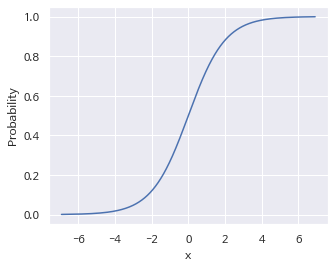

In [4]:
## logistic function = sigmoid
x = logit_df['logit']
phi = 1 / (1 + np.exp(-x)) # x:판별 함수
plt.figure(figsize=(5,4))
plt.plot(x, phi)
plt.xlabel('x')
plt.ylabel('Probability')
plt.show()

In [5]:
# 사례 결과 확인
phi = 1 / (1 + np.exp(-2))
print(phi)

0.8807970779778823


In [6]:
## 데이터셋 로드
from sklearn.datasets import load_breast_cancer

# 데이터 불러오기
data = load_breast_cancer()

# 독립변수 (input data)
b_input_data = data.data

# 종양 : target data
# 악성(malignant:0), 양성(benign:1)
b_target_data = data.target

# 종양 구분
tumar = data.target_names

# 속성 명칭
feature_names = data.feature_names

print('종양 여부 결정 속성 : {}'.format(feature_names))
print('종양 구분 : {}'.format(tumar))

breast_df = pd.DataFrame(b_input_data, columns=feature_names)
breast_df['target'] = b_target_data

# 속성명 공백에 "_"달기
breast_df.columns = [col.replace(" ", "_") for col in breast_df.columns]

종양 여부 결정 속성 : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
종양 구분 : ['malignant' 'benign']


In [7]:
## 데이터 확인
# 데이터 차원
print(breast_df.shape)
# label 데이터 비율 확인
breast_df['target'].value_counts()

(569, 31)


1    357
0    212
Name: target, dtype: int64

In [8]:
## 학습 데이터셋 생성
# 평균 관련된 3개의 속성으로 종양 여부 판단
X = breast_df[['mean_radius', 'mean_texture', 'mean_perimeter' ]] # 독립변수

Y = breast_df['target']

# 80%의 데이터를 학습 데이터로, 20%를 테스트 데이터
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

## 표준화 데이터 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.fit_transform(X_test)

In [9]:
from sklearn.linear_model import LogisticRegression

## 반복횟수(max_iter)를 100으로 지정한 로지스틱 회귀모델
lr = LogisticRegression(max_iter=100)

lr.fit(train_scaled, y_train)

## 테스트 데이터 정확도 확인
# 결과 확인
print("test 데이터셋 정확도", lr.score(test_scaled, y_test))

test 데이터셋 정확도 0.9122807017543859


In [10]:
## 회귀계수 확인
print("coefficient = \n", lr.coef_)
print()
print("intercept = ", lr.intercept_)

coefficient = 
 [[-0.52514614 -0.90583641 -2.86050966]]

intercept =  [0.71500109]


In [11]:
## 테스트 데이터 각 클래스별 확률 확인
# 어떤 클래스 있는 확인
print("Class :", lr.classes_)

# 테스트 데이터
print("테스트 데이터 :\n", test_scaled[:5])

# 테스트 데이터의 각 클래스 확률 확인
print("테스트 데이터의 각 클래스 확률 :\n",lr.predict_proba(test_scaled[:5]))

## 테스트 데이터 예측 결과
Y_pred = lr.predict(test_scaled[:5])
print("예측 결과 :", Y_pred)

Class : [0 1]
테스트 데이터 :
 [[-0.4877952  -0.25088379 -0.46378664]
 [ 1.37325734  0.36318719  1.29254295]
 [ 0.37225845 -0.05148067  0.38772954]
 [-0.50793023 -0.4593507  -0.44808668]
 [-0.75530352 -1.19351674 -0.72985962]]
테스트 데이터의 각 클래스 확률 :
 [[0.07411784 0.92588216]
 [0.98257857 0.01742143]
 [0.63250073 0.36749927]
 [0.06418841 0.93581159]
 [0.01364629 0.98635371]]
예측 결과 : [1 0 0 1 1]


In [12]:
## 판별 함수(decision_function)로z값 산출
# 테스트 데이터 확인
print("테스트 데이터:\n", test_scaled[:5])

# 이진분류의 decision_function은 1 클래스(양성)에 대응하는 값을 반환
decision = lr.decision_function(test_scaled[:5])
print()
print("decision_function = ", np.round(decision[:5], decimals=2))
print()
# 로지스틱 함수 양성(1) 클래스의 확률
phi = 1 / (1 + np.exp(-decision))

# 로지스틱 함수 악성(0) 클래스의 확률
n_phi = 1 - (phi)

print("클래스1 확률: ", phi)
print("클래스0 확률: ", n_phi)

테스트 데이터:
 [[-0.4877952  -0.25088379 -0.46378664]
 [ 1.37325734  0.36318719  1.29254295]
 [ 0.37225845 -0.05148067  0.38772954]
 [-0.50793023 -0.4593507  -0.44808668]
 [-0.75530352 -1.19351674 -0.72985962]]

decision_function =  [ 2.53 -4.03 -0.54  2.68  4.28]

클래스1 확률:  [0.92588216 0.01742143 0.36749927 0.93581159 0.98635371]
클래스0 확률:  [0.07411784 0.98257857 0.63250073 0.06418841 0.01364629]


In [13]:
## 판별 함수 직접 계산

# 테스트 셋 : [-0.4877952 -0.25088379 -0.46378664]
z = (lr.coef_[0][0]*test_scaled[0][0] + lr.coef_[0][1]*test_scaled[0][1] +
    lr.coef_[0][2]*test_scaled[0][2] + lr.intercept_[0])
print("판별 함수 계산 : ", z)

z = -0.52514614*-0.4877952 + -0.90583641*-0.25088379 + -2.86050966 * -0.46378664 + 0.71500109
print("판별 함수 계산 : ", z)

판별 함수 계산 :  2.525090684050562
판별 함수 계산 :  2.5250906919502643


In [14]:
## 모델 평가
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 예측값
Y_pred = lr.predict(test_scaled)

# 성능 리포트 출력
print(classification_report(y_test, lr.predict(test_scaled)))

# 주요 성능 지표
print()
print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=Y_pred))
print('precision = ', precision_score(y_true=y_test, y_pred=Y_pred))
print('recall = ', recall_score(y_true=y_test, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=y_test, y_pred=Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88        43
           1       0.91      0.96      0.93        71

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114


confusion matrix = 
 [[36  7]
 [ 3 68]]
accuracy =  0.9122807017543859
precision =  0.9066666666666666
recall =  0.9577464788732394
f1 score =  0.9315068493150686


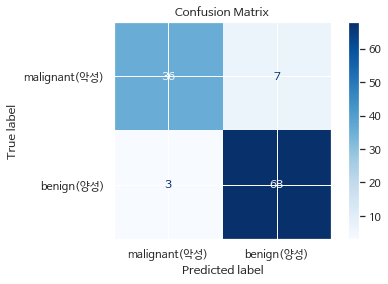

In [15]:
## 시각화
# Confusion Matrix
from sklearn.metrics import plot_confusion_matrix

labels = ['malignant(악성)', 'benign(양성)']
disp = plot_confusion_matrix(lr, test_scaled, y_test,
                             display_labels=labels, 
                             cmap=plt.cm.Blues, 
                             normalize=None)

disp.ax_.set_title('Confusion Matrix');

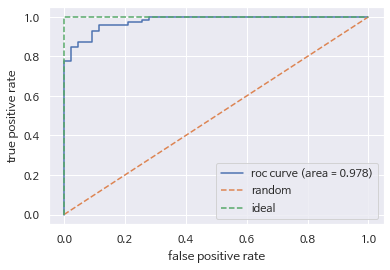

auc =  0.9780543727481166


In [16]:
## ROC Curve
from sklearn.metrics import roc_curve, auc, roc_auc_score

# 검증 데이터가 클래스1에 해당 하는 데이터
Y_score = lr.predict_proba(test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=Y_score)

plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

# AUC Score
print('auc = ', roc_auc_score(y_true=y_test, y_score=Y_score))

In [17]:
## 로지스틱 모델 적합, y = F(x)
import statsmodels.api as sm

# 상수항 추가
X = sm.add_constant(train_scaled)

model_s = sm.Logit(y_train, X)

results = model_s.fit()

Optimization terminated successfully.
         Current function value: 0.204880
         Iterations 9


In [18]:
## 결과 리포트
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  455
Model:                          Logit   Df Residuals:                      451
Method:                           MLE   Df Model:                            3
Date:                Wed, 27 Jul 2022   Pseudo R-squ.:                  0.6894
Time:                        05:00:47   Log-Likelihood:                -93.220
converged:                       True   LL-Null:                       -300.17
Covariance Type:            nonrobust   LLR p-value:                 2.162e-89
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6412      0.194      3.308      0.001       0.261       1.021
x1            20.1777      3.706      5.445      0.000      12.914      27.441
x2            -1.0736      0.208     -5.162      0.000      -1.481      -0.666
x3           -24.4741      3.954     -6.190      0.000     -32.223     -16.725
==============================================================================
"""

In [19]:
# 로지스틱의 log 형태가 취해진 결과
results.params

const     0.641210
x1       20.177741
x2       -1.073557
x3      -24.474142
dtype: float64

In [20]:
# 시그모이드
np.exp(results.params)

const    1.898777e+00
x1       5.795377e+08
x2       3.417905e-01
x3       2.349715e-11
dtype: float64

In [21]:
# 5개 테스트 셋 예측
test_scaled[:5]

array([[-0.4877952 , -0.25088379, -0.46378664],
       [ 1.37325734,  0.36318719,  1.29254295],
       [ 0.37225845, -0.05148067,  0.38772954],
       [-0.50793023, -0.4593507 , -0.44808668],
       [-0.75530352, -1.19351674, -0.72985962]])

In [22]:
# 상수항 추가
X_test = sm.add_constant(test_scaled)

In [23]:
# 예측 (클래스 1일 확률)
results.predict(X_test[:5])

array([0.9182439 , 0.02476274, 0.21728888, 0.8643619 , 0.98949026])

In [24]:
## iris 데이터셋 로드
data = datasets.load_iris()

# 꽃의 특징 (input data)
t_input_data = data['data']

# 꽃 종류를 수치로 나타낸 것 (0 ~ 2) (target data)
target_data = data['target']

# 꽃 종류를 이름으로 나타낸 것
flowers = data['target_names']

# 꽃 특징들의 명칭
feature_names = data['feature_names']

# sepal : 꽃받침, # petal : 꽃잎
print('꽃을 결정짓는 특징 : {}'.format(feature_names))
print('꽃 종류 : {}'.format(flowers))

iris_df = pd.DataFrame(t_input_data, columns=feature_names)
iris_df['species'] = target_data

# 맨 위에 있는 데이터 10개 출력
iris_df.head(5)

꽃을 결정짓는 특징 : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
꽃 종류 : ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
## 데이터 전처리
## 훈련 데이터와 테스트 데이터 분리
# 입력은 'sepal length (cm)', 'sepal width (cm)' 2개 변수만 사용
input_data = t_input_data[:,:2] # 독립변수, 주석 처리할 경우 4개 독립변수 사용
train_input, test_input, train_target, test_target = train_test_split(
input_data, target_data, test_size=0.1, random_state=1)

# 표준점수로 데이터 스케일링
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_input)
test_scaled = scaler.transform(test_input)
print(train_scaled.shape, train_target.shape, test_scaled.shape, test_target.shape)

(135, 2) (135,) (15, 2) (15,)


In [26]:
## 반복횟수(max_iter)를 1000으로 지정한 로지스틱회귀 모델
Dlr = LogisticRegression(max_iter=100)

# 로지스틱회귀 학습
Dlr.fit(train_scaled, train_target)

# 테스트 데이터
print(test_scaled[:5])

# 테스트 데이터 예측 확률
pred = Dlr.predict_proba(test_scaled[:5])
print(pred)

# 테스트 데이터 예측
pred = Dlr.predict(test_scaled[:5])
print(pred)

# 결과 확인
print("test 데이터셋 정확도", Dlr.score(test_scaled, test_target))

[[-0.02086014  2.28989674]
 [-0.87793962 -1.25253328]
 [ 0.95865928 -0.07172327]
 [-0.51061984  2.05373474]
 [ 2.55037832  1.81757274]]
[[9.33038861e-01 2.35032056e-02 4.34579331e-02]
 [1.26883851e-01 7.56846611e-01 1.16269538e-01]
 [2.24144158e-03 3.19944462e-01 6.77814097e-01]
 [9.82762992e-01 8.84177318e-03 8.39523505e-03]
 [1.08899921e-04 3.25884358e-02 9.67302664e-01]]
[0 1 2 0 2]
test 데이터셋 정확도 0.8


In [27]:
## 로지스틱회귀 모델의 가중치와 절편
# 다중 분류 가중치와 절편을 출력하면, 각 클래스마다의 가중치 절편을 출력

print(Dlr.coef_,"\n")
print(Dlr.intercept_)

[[-2.53394973  1.40787349]
 [ 0.68838616 -0.91510719]
 [ 1.84556358 -0.4927663 ]] 

[-1.0274223   0.67787193  0.34955036]


In [28]:
## 결정 함수(decision_function)로 z1 ~ z3의 값 산출
Dlr_decision = Dlr.decision_function(test_scaled[:5])
print(np.round(Dlr_decision, decimals=2))

## 결정 함수 직접 계산
# sesota 클래스 1개 값 계산
setosa_z1 = (-2.53394973 * -0.02086014) + (1.40787349 * 2.28989674) -1.0274223
print(setosa_z1)

# sesota 클래스 5개 값 계산
setosa_z1 = (-2.53394973 * test_scaled[:5][:,0]) + (1.40787349 * test_scaled[:5][:,1]) -1.0274223
print(setosa_z1)

## sesota 클래스 5개의 확률
print(Dlr.predict_proba(test_scaled[:5]) [:5][:,0])

[[ 2.25 -1.43 -0.82]
 [-0.57  1.22 -0.65]
 [-3.56  1.4   2.15]
 [ 3.16 -1.55 -1.6 ]
 [-4.93  0.77  4.16]]
2.249321161204185
[ 2.24932115 -0.56617584 -3.55759401  3.15786141 -4.93104029]
[9.33038861e-01 1.26883851e-01 2.24144158e-03 9.82762992e-01
 1.08899921e-04]


In [29]:
# 소프트맥스 함수를 사용한 각 클래스들의 확률
# 클래스 세 가지 이상인 경우 소프트맥스 (Softmax) 함수를 사용하여 확률 도출
from scipy.special import softmax

proba = softmax(Dlr_decision, axis=1)
print(np.round(proba, decimals=3))

[[0.933 0.024 0.043]
 [0.127 0.757 0.116]
 [0.002 0.32  0.678]
 [0.983 0.009 0.008]
 [0.    0.033 0.967]]


In [30]:
pred = Dlr.predict(test_scaled)
print(pred)

[0 1 2 0 2 2 2 0 0 2 1 0 2 2 1]


In [31]:
# 성능 리포트 출력
print(classification_report(test_target, pred))
from sklearn.metrics import confusion_matrix, accuracy_score

print()
print('confusion matrix = \n', confusion_matrix(y_true=test_target, y_pred=pred))
print('accuracy = ', accuracy_score(y_true=test_target, y_pred=pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.50      0.67         6
           2       0.57      1.00      0.73         4

    accuracy                           0.80        15
   macro avg       0.86      0.83      0.80        15
weighted avg       0.89      0.80      0.79        15


confusion matrix = 
 [[5 0 0]
 [0 3 3]
 [0 0 4]]
accuracy =  0.8
